## Importing Packages and Dataset

In [2]:
#loading
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

     |████████████████████████████████| 64 kB 476 kB/s            


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [3]:
data = pd.read_csv("../input/20kpoints/20k_points.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Amaravati,2019-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chennai,2016-12-19,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,Talcher,2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jorapokhar,2019-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mumbai,2015-04-26,NaN,NaN,NaN,NaN,24.48,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         20000 non-null  object        
 1   Date         19997 non-null  datetime64[ns]
 2   PM2.5        18138 non-null  float64       
 3   PM10         13074 non-null  float64       
 4   NO           18902 non-null  float64       
 5   NO2          18921 non-null  float64       
 6   NOx          17951 non-null  float64       
 7   NH3          14007 non-null  float64       
 8   CO           19253 non-null  float64       
 9   SO2          18722 non-null  float64       
 10  O3           18824 non-null  float64       
 11  Benzene      16694 non-null  float64       
 12  Toluene      15053 non-null  float64       
 13  Xylene       7764 non-null   float64       
 14  AQI          18203 non-null  float64       
 15  Air_quality  18203 non-null  object        
dtypes: d

## **Exploratory Data Analysis**

**Missing value  analysis and Treatment**

<AxesSubplot:>

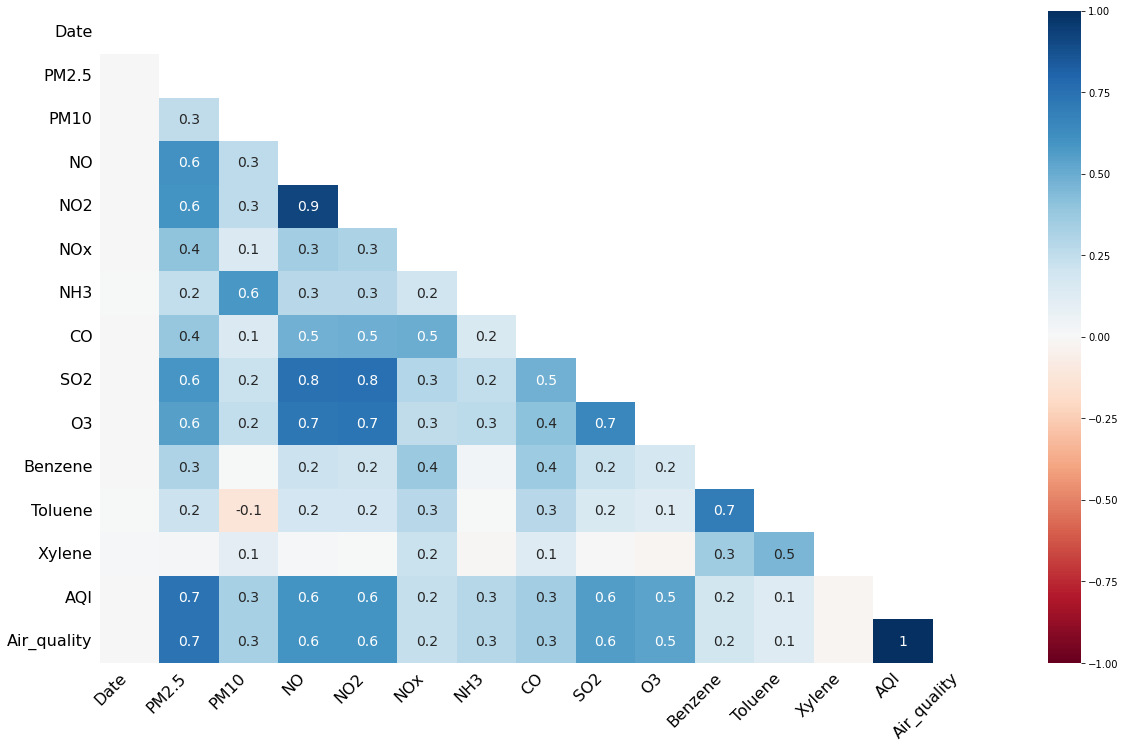

In [5]:
msno.heatmap(data)

In [6]:
import seaborn as sns
# using median 

In [7]:
df1 = data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['Air_quality']=df1['Air_quality'].fillna('Moderate')

In [8]:
df1['City'].nunique()

26

In [9]:
df1['City'].unique()

array(['Amaravati', 'Chennai', 'Talcher', 'Jorapokhar', 'Mumbai',
       'Kolkata', 'Bengaluru', 'Lucknow', 'Gurugram', 'Patna', 'Bhopal',
       'Delhi', 'Hyderabad', 'Amritsar', 'Thiruvananthapuram',
       'Chandigarh', 'Brajrajnagar', 'Visakhapatnam', 'Ahmedabad',
       'Jaipur', 'Coimbatore', 'Shillong', 'Ernakulam', 'Guwahati',
       'Kochi', 'Aizawl'], dtype=object)

In [12]:
old_polluted_cities = ['Amaravati', 'Chennai', 'Talcher', 'Jorapokhar', 'Mumbai',
       'Kolkata', 'Bengaluru', 'Lucknow', 'Gurugram', 'Patna', 'Bhopal',
       'Delhi', 'Hyderabad', 'Amritsar', 'Thiruvananthapuram',
       'Chandigarh', 'Brajrajnagar', 'Visakhapatnam', 'Ahmedabad',
       'Jaipur', 'Coimbatore', 'Shillong', 'Ernakulam', 'Guwahati',
       'Kochi', 'Aizawl']
new_polluted_cities = ["Mexico","Sandiago","Medellin","Fresno","Bakersfield","Visalia","Carlsbad","Chico","Camden","Edinburg","Las_cruces","Modesto","LosAngeles","NewYork","Coyhaique","Redding","Padrelascasas","Logan","Shreveport","Angol","California","Sanfransisco","Dallas","Nevada","Texas","Chicago"]
for i in range(26):
    
    df1['City'] = df1['City'].replace(df1[i],new_polluted_cities[i] )

KeyError: 0

<AxesSubplot:>

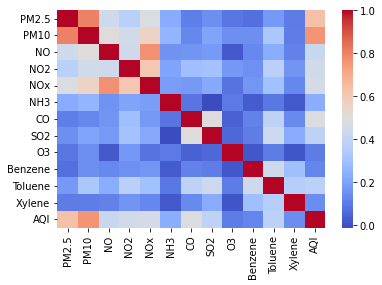

In [8]:
sns.heatmap(data.corr(),cmap='coolwarm')

In [9]:
#using mean

In [10]:
df1 = data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].mean()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].mean()))
df1['NO']=df1['NO'].fillna((df1['NO'].mean()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].mean()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].mean()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].mean()))
df1['CO']=df1['CO'].fillna((df1['CO'].mean()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].mean()))
df1['O3']=df1['O3'].fillna((df1['O3'].mean()))

df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].mean()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].mean()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].mean()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].mean()))
df1['Air_quality']=df1['Air_quality'].fillna('Moderate')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         20000 non-null  object        
 1   Date         19997 non-null  datetime64[ns]
 2   PM2.5        20000 non-null  float64       
 3   PM10         20000 non-null  float64       
 4   NO           20000 non-null  float64       
 5   NO2          20000 non-null  float64       
 6   NOx          20000 non-null  float64       
 7   NH3          20000 non-null  float64       
 8   CO           20000 non-null  float64       
 9   SO2          20000 non-null  float64       
 10  O3           20000 non-null  float64       
 11  Benzene      20000 non-null  float64       
 12  Toluene      20000 non-null  float64       
 13  Xylene       20000 non-null  float64       
 14  AQI          20000 non-null  float64       
 15  Air_quality  20000 non-null  object        
dtypes: d

In [12]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Amaravati,2019-06-07,62.467061,109.230535,15.896122,26.429804,29.844186,22.253747,1.982895,12.944379,29.497753,2.589692,7.663989,2.973098,156.150041,Moderate
1,Chennai,2016-12-19,62.467061,109.230535,15.896122,26.429804,29.844186,22.253747,0.000000,12.944379,29.497753,0.000000,0.000000,2.973098,156.150041,Moderate
2,Talcher,2019-05-03,62.467061,109.230535,15.896122,26.429804,29.844186,22.253747,1.982895,12.944379,29.497753,2.589692,7.663989,2.973098,156.150041,Moderate
3,Jorapokhar,2019-04-14,62.467061,109.230535,15.896122,26.429804,29.844186,22.253747,1.982895,12.944379,29.497753,2.589692,7.663989,2.973098,156.150041,Moderate
4,Mumbai,2015-04-26,62.467061,109.230535,15.896122,26.429804,24.480000,22.253747,0.000000,12.944379,29.497753,0.000000,0.000000,0.000000,156.150041,Moderate


## Pre Corona [2016 to 2020]

**Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and find how these contents correlated with AQI (air quality index)**

In [13]:
df = df1.copy()
df = df[df['Date'] <= ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          16709 non-null  object        
 1   Date                          16709 non-null  datetime64[ns]
 2   AQI                           16709 non-null  float64       
 3   Air_quality                   16709 non-null  object        
 4   Vehicular Pollution content   16709 non-null  float64       
 5   Industrial Pollution content  16709 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 913.8+ KB


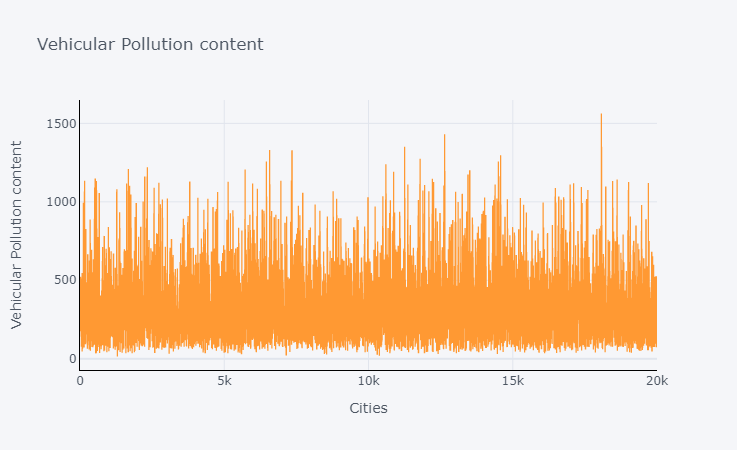

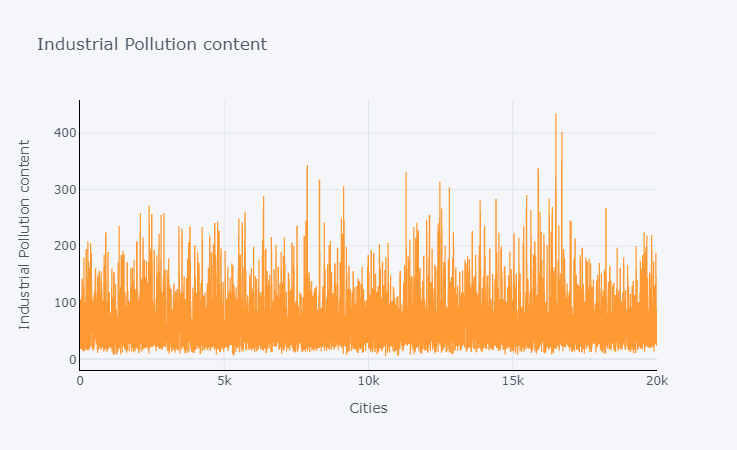

In [14]:
def ploting(var):
    df[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

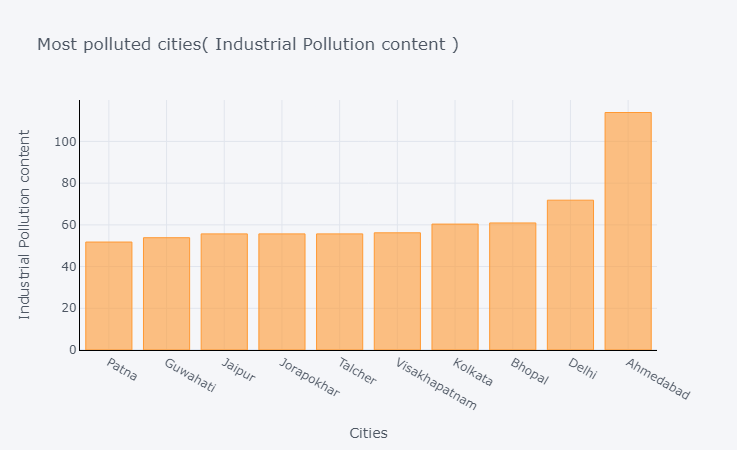

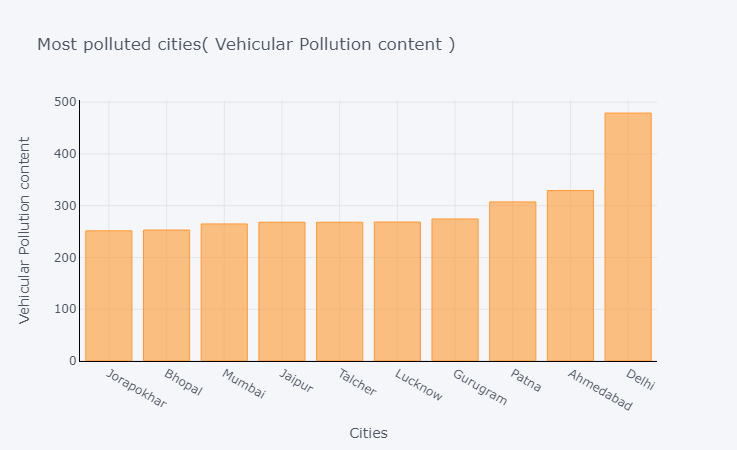

In [15]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

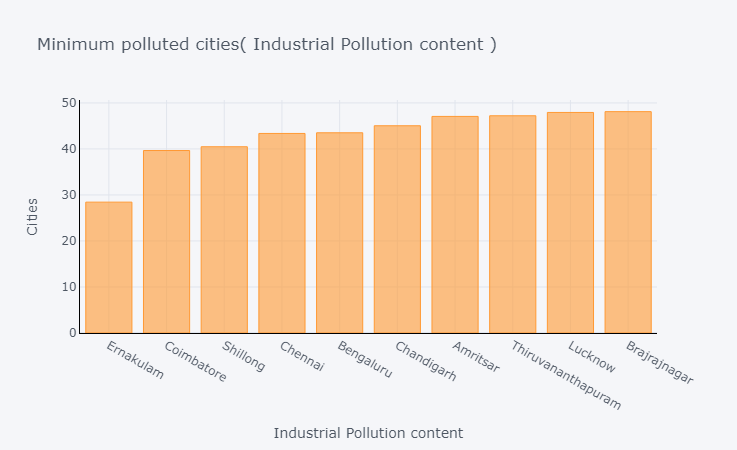

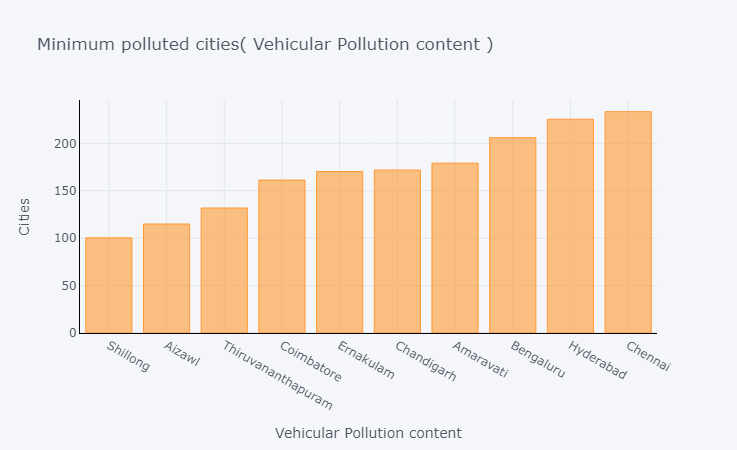

In [16]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

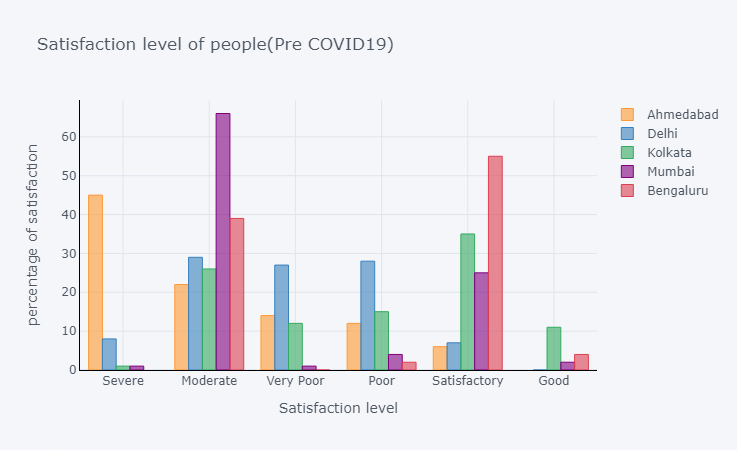

In [17]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] <= '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','Air_quality']]
    AQI[var] = AQI['Air_quality']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Pre COVID19)')

## Post Corona [2020 >]

In [18]:
df = df1.copy()
df = df[df['Date'] > ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 37 to 19991
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          3288 non-null   object        
 1   Date                          3288 non-null   datetime64[ns]
 2   AQI                           3288 non-null   float64       
 3   Air_quality                   3288 non-null   object        
 4   Vehicular Pollution content   3288 non-null   float64       
 5   Industrial Pollution content  3288 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 179.8+ KB


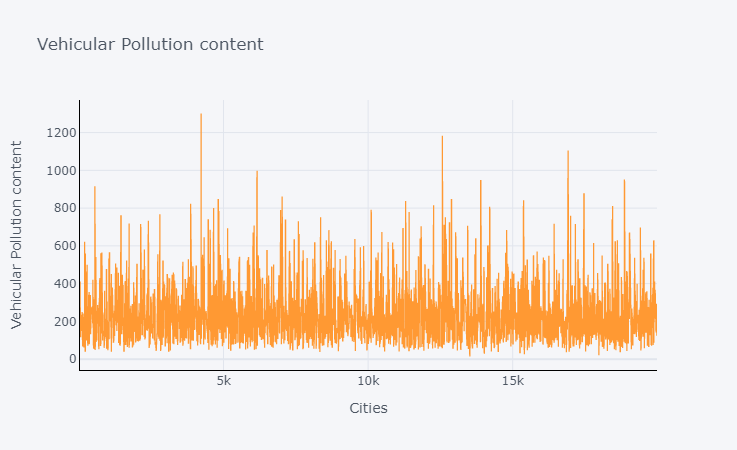

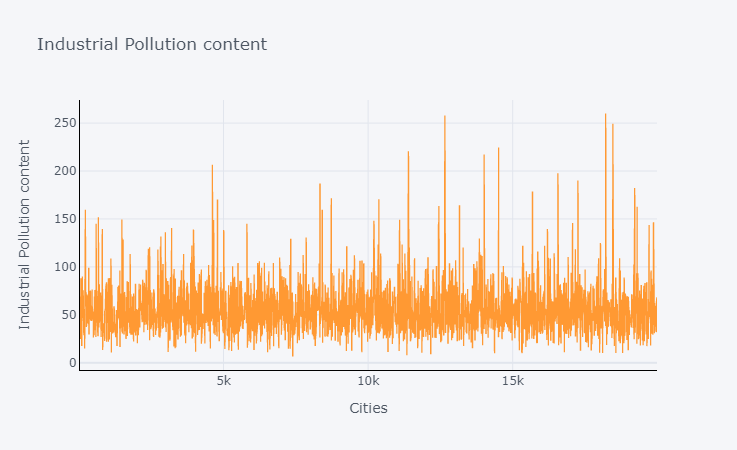

In [19]:
def ploting(var):
    df[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

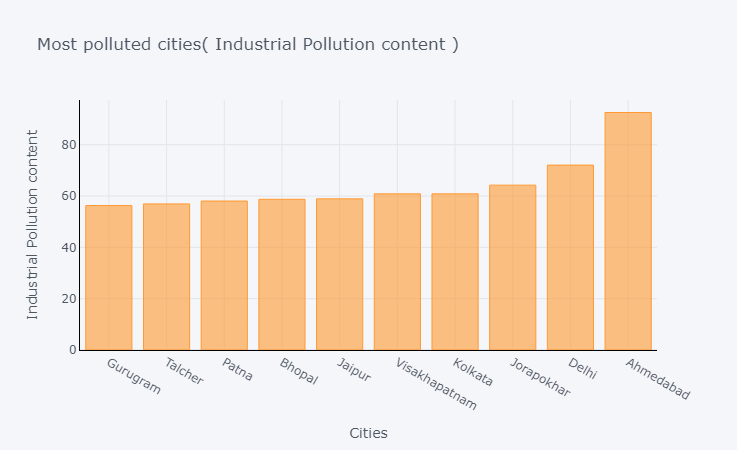

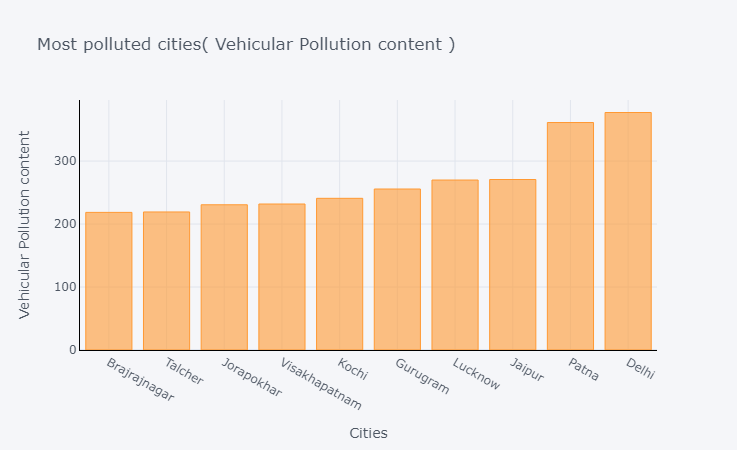

In [20]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

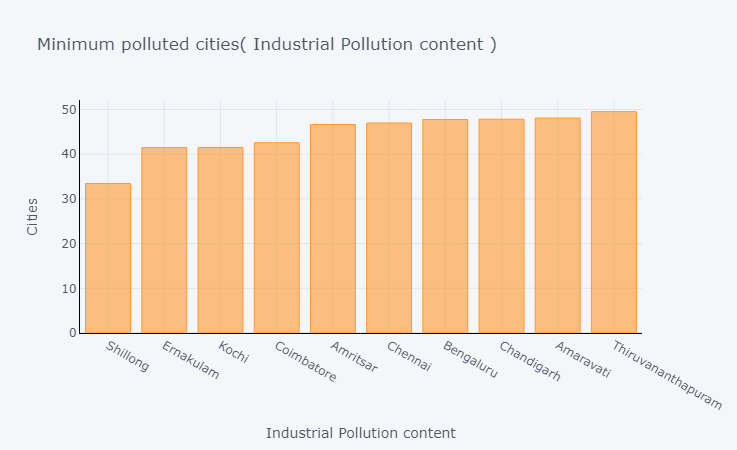

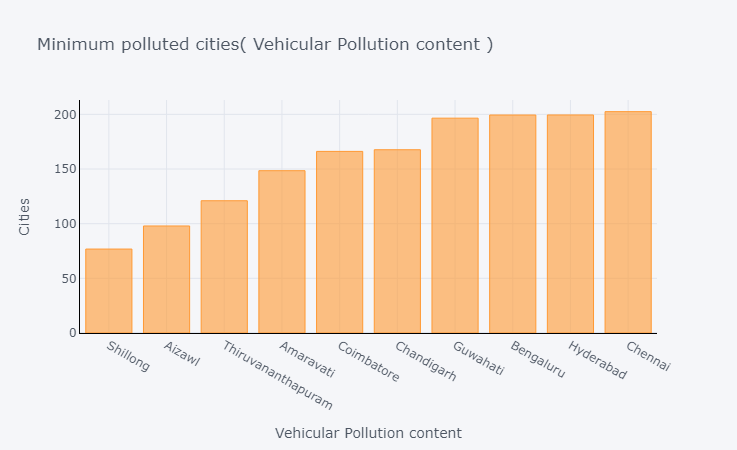

In [21]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

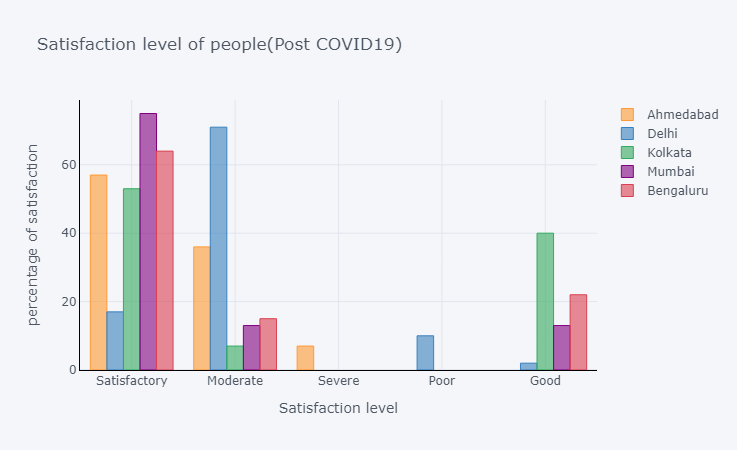

In [22]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] > '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','Air_quality']]
    AQI[var] = AQI['Air_quality']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Post COVID19)')

## Preprocessing

In [23]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['Air_quality']=le.fit_transform(df1['Air_quality'].astype(str))
df1.info()

categorical_attributes ['City', 'Air_quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         20000 non-null  int64         
 1   Date         19997 non-null  datetime64[ns]
 2   PM2.5        20000 non-null  float64       
 3   PM10         20000 non-null  float64       
 4   NO           20000 non-null  float64       
 5   NO2          20000 non-null  float64       
 6   NOx          20000 non-null  float64       
 7   NH3          20000 non-null  float64       
 8   CO           20000 non-null  float64       
 9   SO2          20000 non-null  float64       
 10  O3           20000 non-null  float64       
 11  Benzene      20000 non-null  float64       
 12  Toluene      20000 non-null  float64       
 13  Xylene       20000 non-null  float64       
 14  AQI          20000 non-null  float64       
 15  Air_qu

In [24]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,2,2019-06-07,62.467061,109.230535,15.896122,26.429804,29.844186,22.253747,1.982895,12.944379,29.497753,2.589692,7.663989,2.973098,156.150041,1
1,8,2016-12-19,62.467061,109.230535,15.896122,26.429804,29.844186,22.253747,0.000000,12.944379,29.497753,0.000000,0.000000,2.973098,156.150041,1
2,23,2019-05-03,62.467061,109.230535,15.896122,26.429804,29.844186,22.253747,1.982895,12.944379,29.497753,2.589692,7.663989,2.973098,156.150041,1
3,16,2019-04-14,62.467061,109.230535,15.896122,26.429804,29.844186,22.253747,1.982895,12.944379,29.497753,2.589692,7.663989,2.973098,156.150041,1
4,20,2015-04-26,62.467061,109.230535,15.896122,26.429804,24.480000,22.253747,0.000000,12.944379,29.497753,0.000000,0.000000,0.000000,156.150041,1


In [25]:
cor = df1.corr()
cor.style.background_gradient(cmap='coolwarm')

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
City,1.000000,0.084345,-0.006719,0.058038,-0.000561,0.055708,-0.055130,-0.226267,-0.073631,-0.026467,0.004309,-0.036116,-0.031335,-0.053953,-0.027505
PM2.5,0.084345,1.000000,0.490400,0.430513,0.362735,0.425403,0.157584,0.107215,0.138278,0.085248,0.067299,0.162428,0.062803,0.622304,0.360559
PM10,-0.006719,0.490400,1.000000,0.420599,0.340785,0.447008,0.183015,0.048153,0.136598,0.119118,0.110521,0.198781,0.047647,0.462036,0.155723
NO,0.058038,0.430513,0.420599,1.000000,0.436186,0.737401,0.130045,0.161564,0.176531,0.022368,0.127134,0.215508,0.079450,0.407719,0.236361
NO2,-0.000561,0.362735,0.340785,0.436186,1.000000,0.582534,0.164486,0.290410,0.302041,0.167642,0.142634,0.342836,0.118645,0.438030,0.206534
NOx,0.055708,0.425403,0.447008,0.737401,0.582534,1.000000,0.152930,0.171852,0.200730,0.074613,0.157776,0.273033,0.084399,0.425108,0.211631
NH3,-0.055130,0.157584,0.183015,0.130045,0.164486,0.152930,1.000000,0.019941,-0.007622,0.079552,0.021289,0.053344,0.007847,0.136073,0.078915
CO,-0.226267,0.107215,0.048153,0.161564,0.290410,0.171852,0.019941,1.000000,0.486665,0.036080,0.117247,0.379553,0.130077,0.474475,0.176322
SO2,-0.073631,0.138278,0.136598,0.176531,0.302041,0.200730,-0.007622,0.486665,1.000000,0.049971,0.094391,0.377719,0.179057,0.370933,0.138984
O3,-0.026467,0.085248,0.119118,0.022368,0.167642,0.074613,0.079552,0.036080,0.049971,1.000000,0.012243,0.085532,0.005679,0.095410,-0.000591


In [33]:
df1['City'].unique()

array([ 2,  8, 23, 16, 20, 18,  4, 19, 12, 21,  5, 10, 14,  3, 24,  7,  6,
       25,  0, 15,  9, 22, 11, 13, 17,  1])

In [34]:
y = df1["Air_quality"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [35]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 5772, 3: 4544, 2: 1291, 5: 1258, 0: 661, 4: 474})


> **Data Imbalance:**

>  Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [36]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({3: 5772, 1: 5772, 2: 5772, 5: 5772, 0: 5772, 4: 5772})


## Classification

In [37]:
X_train.drop_duplicates()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34632 entries, 0 to 34631
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     34632 non-null  int64  
 1   PM2.5    34632 non-null  float64
 2   PM10     34632 non-null  float64
 3   NO       34632 non-null  float64
 4   NO2      34632 non-null  float64
 5   NOx      34632 non-null  float64
 6   NH3      34632 non-null  float64
 7   CO       34632 non-null  float64
 8   SO2      34632 non-null  float64
 9   O3       34632 non-null  float64
 10  Benzene  34632 non-null  float64
 11  Toluene  34632 non-null  float64
 12  Xylene   34632 non-null  float64
 13  AQI      34632 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 3.7 MB


### 1. Support Vector Machine

In [38]:
cls=SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
svmpred
cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

confussion matrix
[[ 316    0    0    0    0    0]
 [   0 2366   58   38    0    0]
 [   0    2  551    0    0   12]
 [  91   27    0 1828    1    0]
 [   0    0    0    0  183    8]
 [   0    0    6    0    4  509]]


accuracy 95.88333333333333


### 2. Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

confussion matrix
[[ 316    0    0    0    0    0]
 [   0 2460    2    0    0    0]
 [   0    4  560    0    0    1]
 [   0    0    0 1947    0    0]
 [   0    0    1    0  188    2]
 [   0    4    1    0    1  513]]


accuracy 99.73333333333333


### 3. XGBoost

In [41]:
gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)*100
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("accuracy",accuracy,"by filling null values with mean")

[08:57:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[ 316    0    0    0    0    0]
 [   0 2462    0    0    0    0]
 [   0    1  563    0    0    1]
 [   0    0    0 1947    0    0]
 [   0    0    0    0  190    1]
 [   0    0    1    0    1  517]]


accuracy 99.91666666666667 by filling null values with mean


## Conclusion

>1. Vehicular pollution contents are more related to air quality index.
>2. Delhi is the most polluted city in terms of vehicular pollution contents.
>3. Ahmadabad is the most polluted city in terms of industrial pollution content.
>4. After COVID19 pandemic there is gradual dicrease in vehicular pollution contents, industrial pollution content.
>5. Extra Gradient Boost classifier 100% accurately classify the target variable.